# Compare two binaries

In [1]:
import sys
sys.path.append('/mnt/home/mrenzo/codes/python_stuff/plotFunc/')
from MESAreader import *
import matplotlib.pyplot as plt
from plotDefaults import *


In [2]:
set_plotDefaults()

done in plotDefaults.py


In [3]:
root = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/"
binary1 = root+"/fiducial/binary_to_donor_TAMS/"
binary2 = root+"/delta_coeff0.8/"

/mnt/home/mrenzo/RUNS/zeta_ophiuchi//fiducial/binary_to_donor_TAMS/
/mnt/home/mrenzo/RUNS/zeta_ophiuchi//delta_coeff0.8/
4701


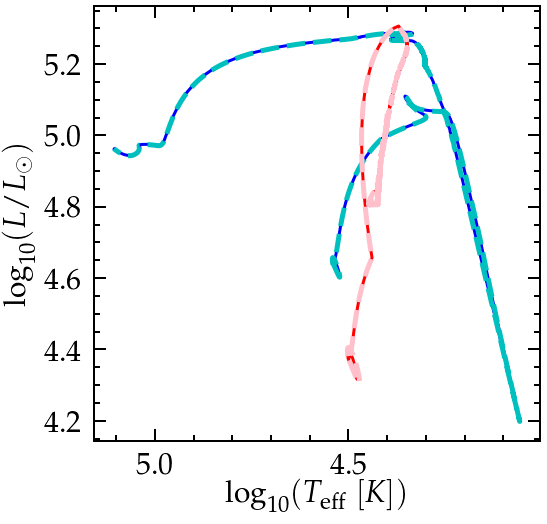

In [5]:
def getlogLlogTeff(hfile):
    src, col = getSrcCol(hfile)
    log_Teff = src[:, col.index("log_Teff")]
    logL = src[:, col.index("log_L")]
    return logL, log_Teff


def HRD(binary1, binary2, figName=""):
    print(colored(binary1, "blue"))
    print(colored(binary2, "blue"))
    fig = plt.figure()
    gs = gridspec.GridSpec(100, 100)
    ax = fig.add_subplot(gs[:,:])
    
    # donors
    # ------binary1
    hfile_donor1 = binary1+'/LOGS1/history.data'
    Ldonor1, Teffdonor1 = getlogLlogTeff(hfile_donor1)
    ax.plot(Teffdonor1, Ldonor1, c='b')
    # ------binary1
    hfile_donor2 = binary2+'/LOGS1/history.data'
    Ldonor2, Teffdonor2 = getlogLlogTeff(hfile_donor2)
    ax.plot(Teffdonor2, Ldonor2, c='c', lw=5, ls='--')
    print (len(Teffdonor2))
    # accretors
    # ---------binary2
    hfile_accretor1 = binary1+'/LOGS2/history.data'
    Laccretor1, Teffaccretor1 = getlogLlogTeff(hfile_accretor1)
    ax.plot(Teffaccretor1, Laccretor1, c='r')
    # ------binary1
    hfile_accretor2 = binary2+'/LOGS2/history.data'
    Laccretor2, Teffaccretor2 = getlogLlogTeff(hfile_accretor2)
    ax.plot(Teffaccretor2, Laccretor2, c='#FFC0CB', lw=5, ls='--')
    
    ax.invert_xaxis()
    ax.set_xlabel(r"$\log_{10}(T_\mathrm{eff}\ [K])$")
    ax.set_ylabel(r"$\log_{10}(L/L_\odot)$")
    if figName!="":
        plt.savefig(figName, dpi=10)

# test
HRD(binary1, binary2)    

/mnt/home/mrenzo/RUNS/zeta_ophiuchi//fiducial/binary_to_donor_TAMS/
/mnt/home/mrenzo/RUNS/zeta_ophiuchi//delta_coeff0.8/
/mnt/home/mrenzo/RUNS/zeta_ophiuchi//fiducial/binary_to_donor_TAMS/
/mnt/home/mrenzo/RUNS/zeta_ophiuchi//delta_coeff0.8/


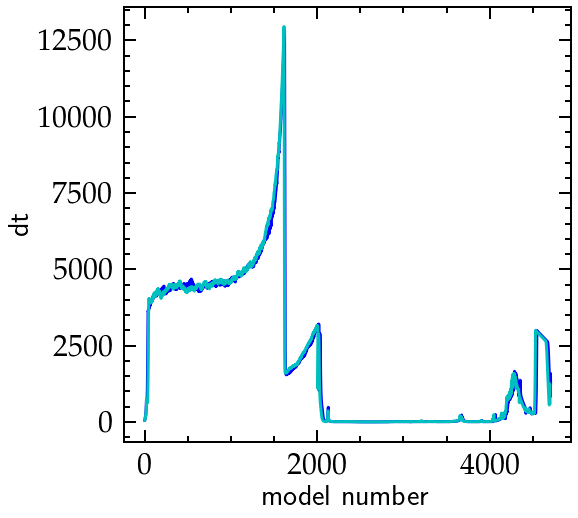

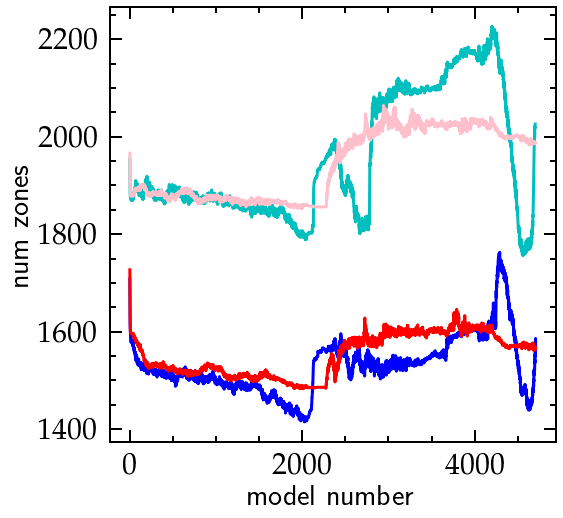

In [13]:
def get_timesteps_mesh(hfile):
    src, col = getSrcCol(hfile)
    mn = src[:, col.index("model_number")]
    dt = src[:, col.index("log_dt")]
    nz = src[:, col.index("num_zones")]
    return mn, 10**dt, nz

def dt_plot(binary1, binary2):
    print(colored(binary1, "blue"))
    print(colored(binary2, "blue"))
    fig = plt.figure()
    gs = gridspec.GridSpec(100, 100)
    ax = fig.add_subplot(gs[:,:])
    
    hfile_donor1 = binary1+'/LOGS1/history.data'
    mn, dt, nz = get_timesteps_mesh(hfile_donor1)
    ax.plot(mn, dt, c='b')
    
    hfile_donor2 = binary2+'/LOGS1/history.data'
    mn, dt, nz = get_timesteps_mesh(hfile_donor2)
    ax.plot(mn, dt, c='c')

    # timesteps are the same, so no need for showing accretors
    # hfile_accretor1 = binary1+'/LOGS2/history.data'
    # mn, dt, nz = get_timesteps_mesh(hfile_accretor1)
    # ax.plot(mn, dt, c='r')

    # hfile_accretor2 = binary2+'/LOGS2/history.data'
    # mn, dt, nz = get_timesteps_mesh(hfile_accretor2)
    # ax.plot(mn, dt, c='#FFC0CB')

    ax.set_xlabel(r"model number")
    ax.set_ylabel(r"dt")




def nz_plot(binary1, binary2):
    print(colored(binary1, "blue"))
    print(colored(binary2, "blue"))
    fig = plt.figure()
    gs = gridspec.GridSpec(100, 100)
    ax = fig.add_subplot(gs[:,:])
    
    hfile_donor1 = binary1+'/LOGS1/history.data'
    mn, dt, nz = get_timesteps_mesh(hfile_donor1)
    ax.plot(mn, nz, c='b')
    
    hfile_donor2 = binary2+'/LOGS1/history.data'
    mn, dt, nz = get_timesteps_mesh(hfile_donor2)
    ax.plot(mn, nz, c='c')

    hfile_accretor1 = binary1+'/LOGS2/history.data'
    mn, dt, nz = get_timesteps_mesh(hfile_accretor1)
    ax.plot(mn, nz, c='r')

    hfile_accretor2 = binary2+'/LOGS2/history.data'
    mn, dt, nz = get_timesteps_mesh(hfile_accretor2)
    ax.plot(mn, nz, c='#FFC0CB')

    ax.set_xlabel(r"model number")
    ax.set_ylabel(r"num zones")

    
dt_plot(binary1, binary2)
nz_plot(binary1, binary2)  

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  func(*args, **kwargs)


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.canvas.print_figure(bytes_io, **kw)


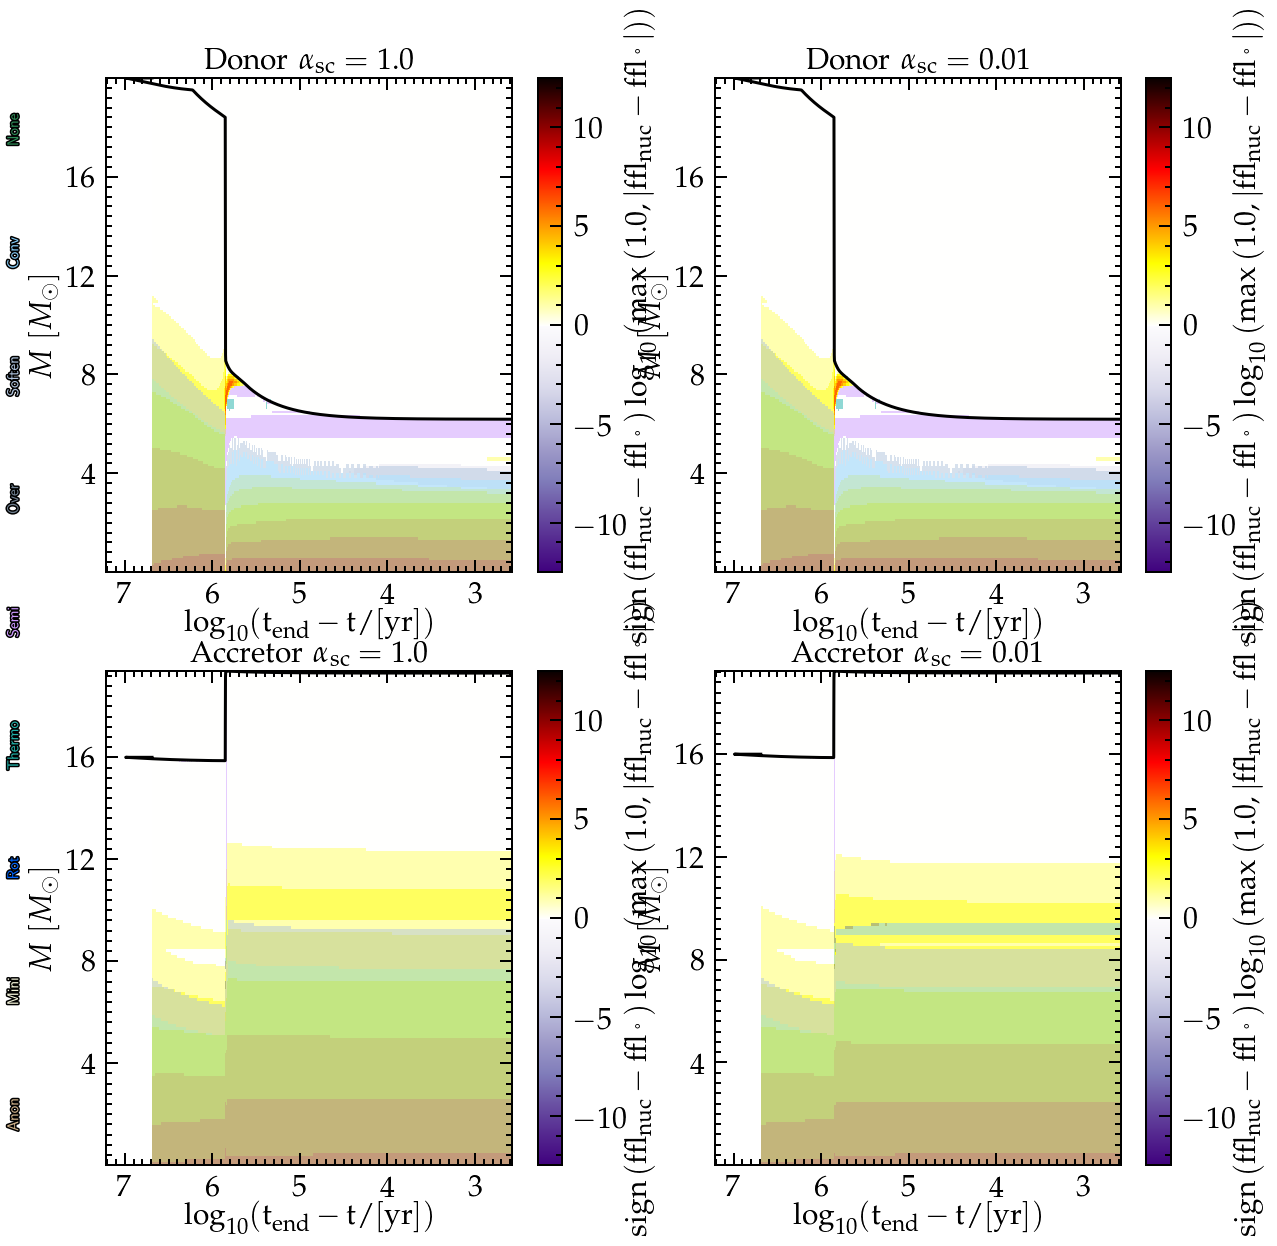

In [6]:
#Kippenhahns
def mkFourKipp(binary1, binary2, figName=""):
    fig = plt.figure(figsize=(20,20))
    # gs = gridspec.GridSpec(100, 100)
    # ax1 = fig.add_subplot(gs[:50,:50])
    # ax2 = fig.add_subplot(gs[:50,50:])
    # ax3 = fig.add_subplot(gs[50:,:50])
    # ax4 = fig.add_subplot(gs[50:,50:])
    gs = gridspec.GridSpec(2, 2)
    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])
    ax3 = fig.add_subplot(gs[2])
    ax4 = fig.add_subplot(gs[3])
    axes = [ax1,ax2,ax3,ax4]
    
    x= 'star_age'

    folder_hfile_donor1 = binary1+'/LOGS1/'
    mmm.loadHistory(f=folder_hfile_donor1)
    ppp.plotKip3(mmm, fig=fig, ax=ax1,
                 xaxis=x,
                 # yaxis="radius",
                 reloadHistory=False,
                 show_mass_loc=False,
                 show_mix_labels=True,
                 show=False,
                 mix_alpha=0.5,# mix_hatch='//', hatch_color='#98ef56', 
                 age_lookback=True,
                 age_log=True,
                 zone_frac = 10, #0.2,
                 cmin=-12.45, cmax=12.5)
    ax1.set_title(r"$\mathrm{Donor} \ \alpha_\mathrm{sc}=1.0$", fontsize=30)

    
    folder_hfile_donor2 = binary2+'/LOGS1/'
    mmm.loadHistory(f=folder_hfile_donor1)
    ppp.plotKip3(mmm, fig=fig, ax=ax2,
                 xaxis=x,
                 # yaxis="radius",
                 reloadHistory=False,
                 show_mass_loc=False,
                 show_mix_labels=False,
                 show=False,
                 mix_alpha=0.5,# mix_hatch='//', hatch_color='#98ef56', 
                 age_lookback=True,
                 age_log=True,
                 zone_frac = 10, #0.2,
                 cmin=-12.5, cmax=12.5)
    ax2.set_title(r"$\mathrm{Donor} \ \alpha_\mathrm{sc}=0.01$", fontsize=30)

    folder_hfile_accretor1 = binary1+'/LOGS2/'
    mmm.loadHistory(f=folder_hfile_accretor1)
    ppp.plotKip3(mmm, fig=fig, ax=ax3,
                 xaxis=x,
                 # yaxis="radius",
                 reloadHistory=False,
                 show_mass_loc=False,
                 show_mix_labels=False,
                 show=False,
                 mix_alpha=0.5,# mix_hatch='//', hatch_color='#98ef56', 
                 age_lookback=True,
                 age_log=True,
                 zone_frac = 10, #0.2,
                 cmin=-12.5, cmax=12.5)
    ax3.set_title(r"$\mathrm{Accretor} \ \alpha_\mathrm{sc}=1.0$", fontsize=30)
    

    folder_hfile_accretor2 = binary2+'/LOGS2/'
    mmm.loadHistory(f=folder_hfile_accretor2)
    ppp.plotKip3(mmm, fig=fig, ax=ax4,
                 xaxis=x,
                 # yaxis="radius",
                 reloadHistory=False,
                 show_mass_loc=False,
                 show_mix_labels=False,
                 show=False,
                 mix_alpha=0.5,# mix_hatch='//', hatch_color='#98ef56', 
                 age_lookback=True,
                 age_log=True,
                 zone_frac = 10, #0.2,
                 cmin=-12.5, cmax=12.5)
    ax4.set_title(r"$\mathrm{Accretor} \ \alpha_\mathrm{sc}=0.01$", fontsize=30)


    for ax in axes:
        #ax.text(0.5,0.5, axes.index(ax), fontsize=30)
        # ax.set_xlabel(r"$\mathrm{Model \ Number}$", fontsize=30)
        ax.set_xlabel(r"$\log_{10}(\mathrm{t_{end} -t / [yr]})$", fontsize=30)
        # ax.set_xlabel(r"$\mathrm{time [yr]}$", fontsize=30)
        ax.set_ylabel(r"$M \ [M_\odot]$", fontsize=30)
        # ax.set_ylabel(r"$R \ [R_\odot]$", fontsize=30)

    
    # save figure if needed
    if figName!="":
        plt.savefig(figName, dpi=10)

    
mkFourKipp(binary1, binary2)
